In [1]:
# Import required libraries
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis (EDA)

- id: Unique identifier for each movie 
- popularity: Numeric value indicating the popularity of the movie 
- budget: Production cost of the movie 
- revenue: Revenue generated by the movie 
- original_title: Original title of the movie 
- cast: List of actors in the movie 
- director: Director of the movie 
- runtime: Duration of the movie in minutes 
- genres: Genre or categories of the movie 
- production_companies: List of production companies involved in the movie 
- release_date: Release date of the movie 
- vote_count: Total count of votes received for the movie 
- vote_average: Average vote or rating given by viewers 
- release_year: Year in which the movie was released 

In [2]:
df = pd.read_csv('movies_data.csv')


In [3]:
# Show initial information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview','production_companies' ,'budget_adj', 'revenue_adj'], axis = 1, inplace=True)

In [5]:
# Finding Missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0: "miss_count"})
miss["miss_%"] = (miss.miss_count / len(df.id)) * 100
miss

,miss_count,miss_%
id,0,0.000000
popularity,0,0.000000
budget,0,0.000000
revenue,0,0.000000
original_title,0,0.000000
cast,76,0.699429
director,44,0.404933
runtime,0,0.000000
genres,23,0.211669
release_date,0,0.000000


In [6]:
# Dropping Na's from the following columns
df.dropna(subset=['director','genres', 'cast'],inplace=True)
df.reset_index(inplace=True,drop=True)

# Duplicate data delete
print(df.duplicated().sum())
df.drop_duplicates(inplace= True)
print(df.duplicated().sum())


1
0


In [7]:
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [8]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015


In [9]:
# Split the 'genres' column by "|" and expand into new columns
df_genres = df['genres'].str.split('|', expand=True)

# Create new columns 'genres1', 'genres2', and 'genres3' to store the first three genres
df['genres1'] = df_genres[0]
df['genres2'] = df_genres[1]
df['genres3'] = df_genres[2]

# Drop the original 'genres' column
df.drop(['genres'], axis=1, inplace=True)


In [10]:
df.describe().style.background_gradient(cmap="Blues")

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,14803646.144069,40319887.588016,102.468829,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,31064555.963598,117652420.936263,30.493873,578.815324,0.930283,12.820151
min,5.000000,0.000188,0.000000,0.000000,0.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,0.000000,0.000000,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,0.000000,0.000000,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,16000000.000000,25000000.000000,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,425000000.000000,2781505847.000000,900.000000,9767.000000,9.200000,2015.000000


# Visualization

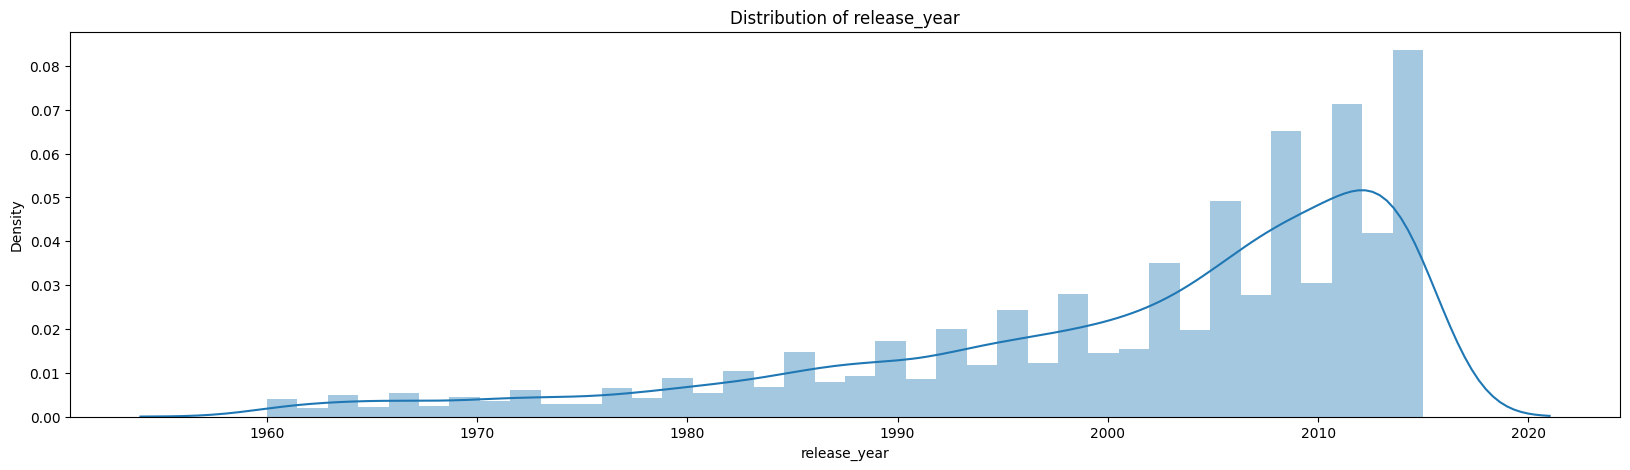

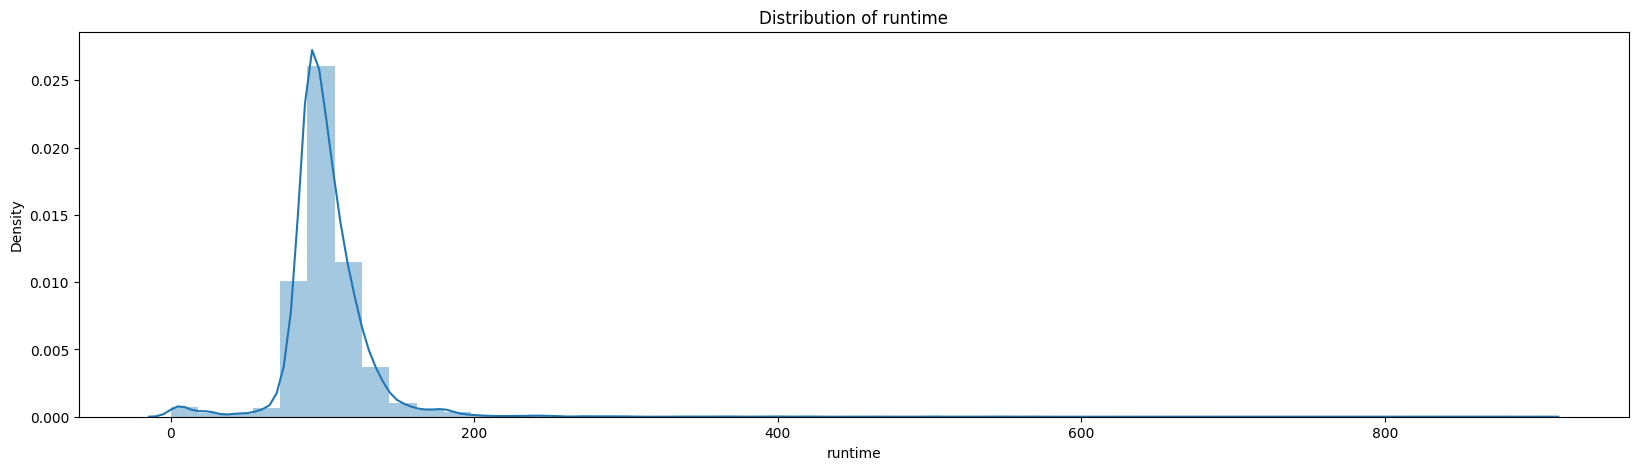

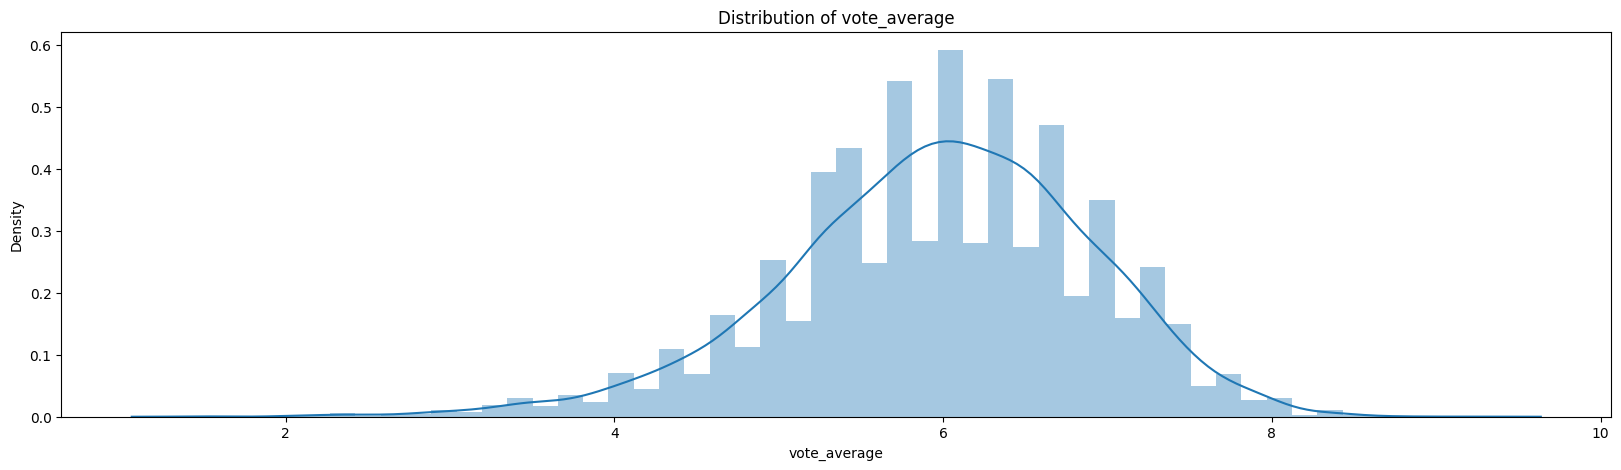

In [34]:
def plot_distribution(data, column, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    sns.distplot(data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

plot_distribution(df, 'release_year')
plot_distribution(df, 'runtime')
plot_distribution(df, 'vote_average')

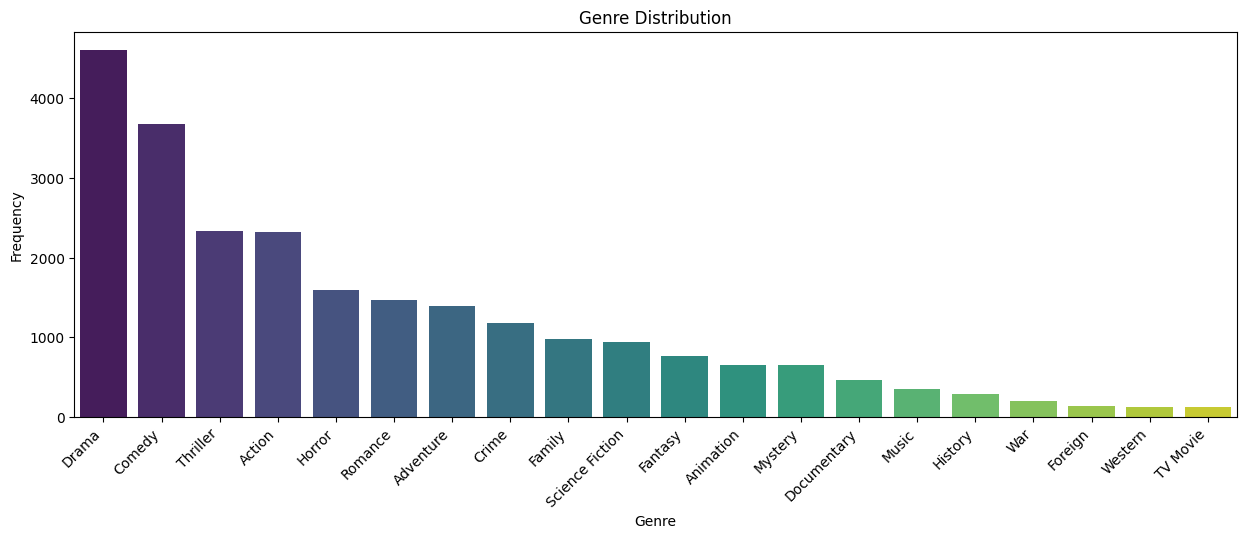

In [13]:
def plot_genre_distribution(data, genre_columns, figsize=(15, 5)):

    all_genres = data[genre_columns].values.flatten()
    all_genres = [genre for genre in all_genres if genre is not None]
    genre_counts = pd.Series(all_genres).value_counts()

   
    plt.figure(figsize=figsize)
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
    plt.title('Genre Distribution')
    plt.xlabel('Genre')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  
    plt.show()

plot_genre_distribution(df, ['genres1', 'genres2', 'genres3'])


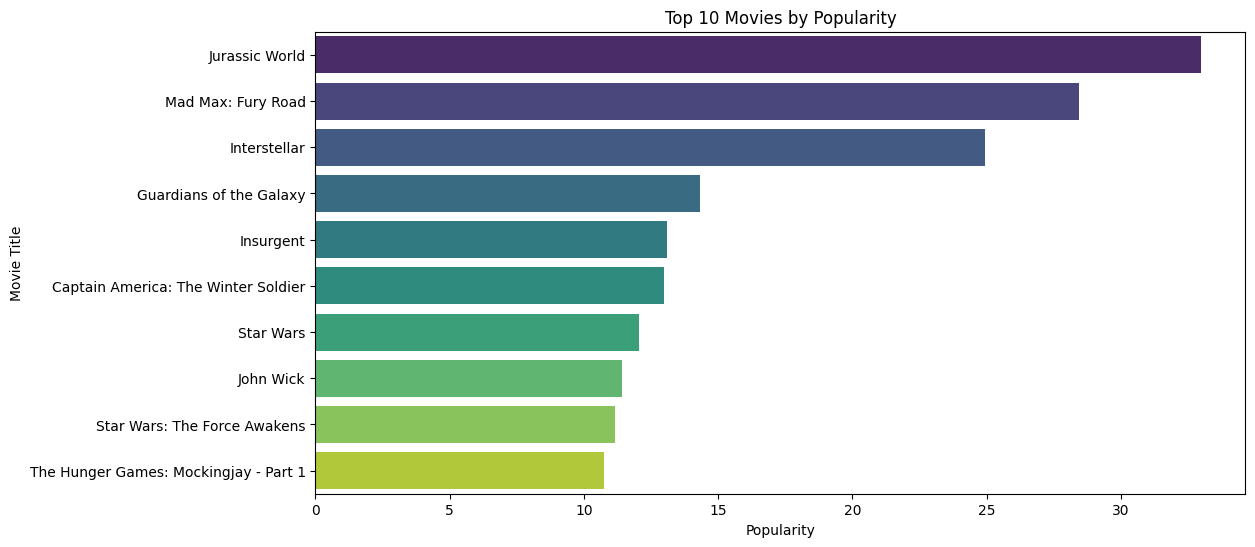

In [20]:
top_10_popular_movies = df.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='original_title', data=top_10_popular_movies, palette='viridis')
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Movie Title')
plt.show()

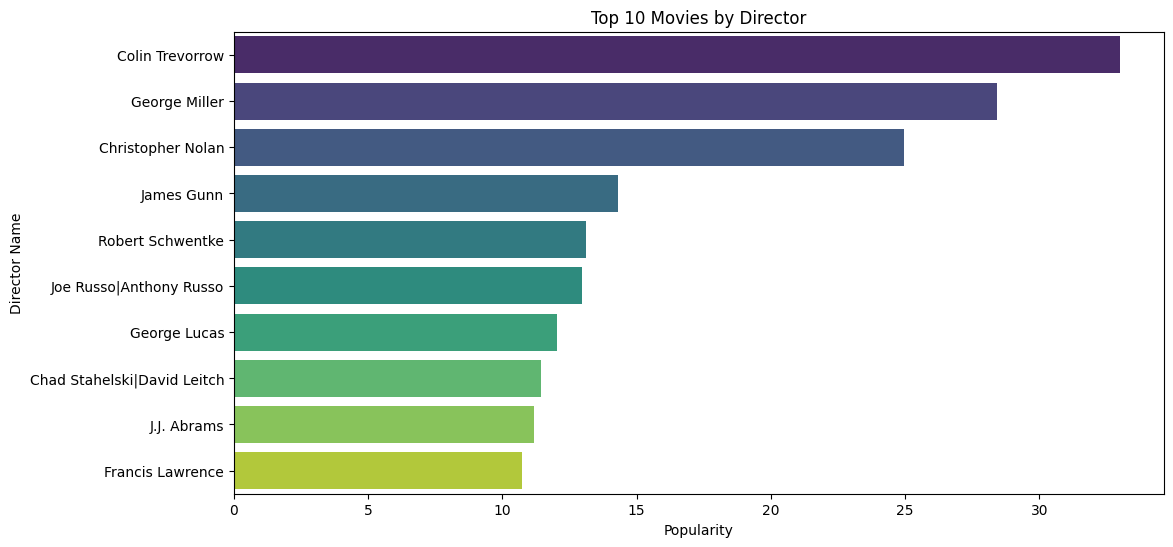

In [33]:
top_10_popular_director = df.sort_values(by='director', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='popularity', y='director', data=top_10_popular_movies, palette='viridis')
plt.title('Top 10 Movies by Director')
plt.xlabel('Popularity')
plt.ylabel('Director Name')
plt.show()

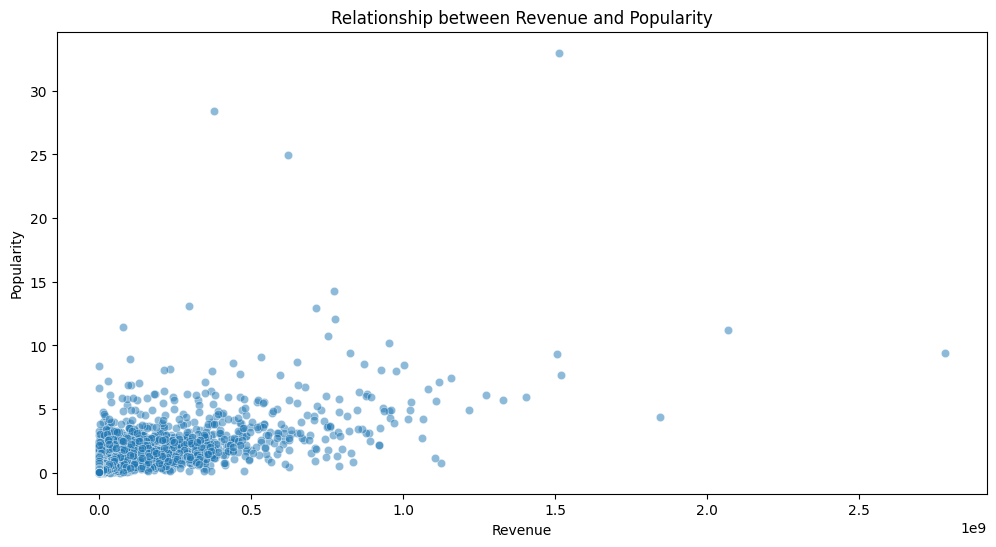

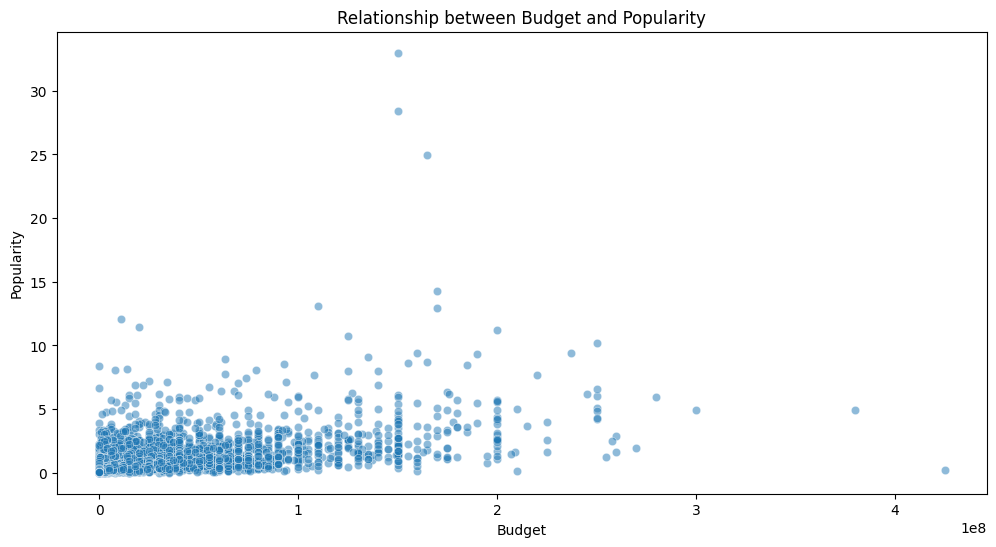

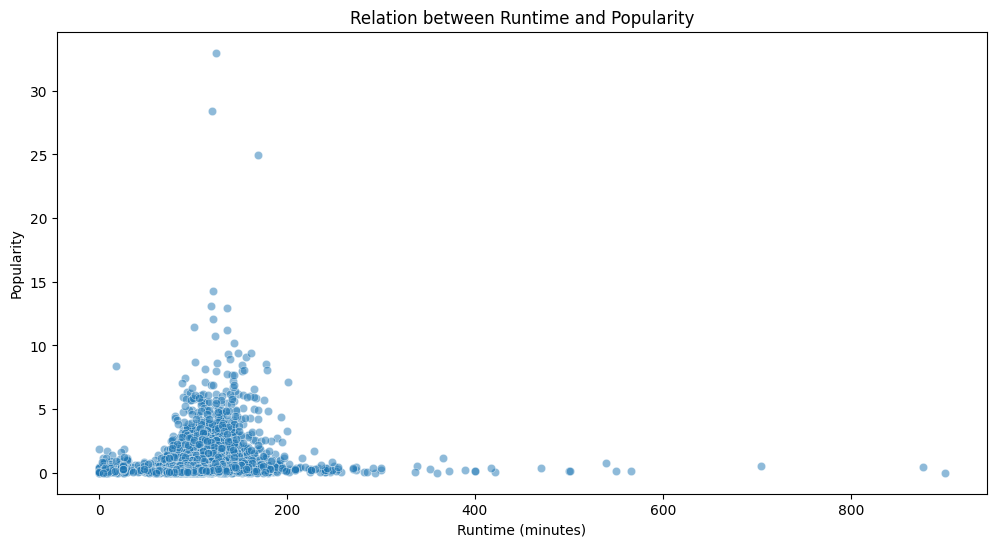

In [31]:
def create_scatter_plot(x, y, data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    scatter_plot = sns.scatterplot(x=x, y=y, data=data, alpha=0.5, palette='viridis')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


create_scatter_plot('revenue', 'popularity', df, 'Relationship between Revenue and Popularity', 'Revenue', 'Popularity')
create_scatter_plot('budget', 'popularity', df, 'Relationship between Budget and Popularity', 'Budget', 'Popularity')
create_scatter_plot('runtime', 'popularity', df, 'Relation between Runtime and Popularity', 'Runtime (minutes)', 'Popularity')